## Find mean price for Toyota Prius Gen2 (2003-2009)

In [11]:
import pandas as pd
from selenium import webdriver
from re import sub
from decimal import Decimal

Using data from Car gurus search result

In [ ]:
driver = webdriver.Chrome(executable_path = 'C:\\Users\\sakan_\\PremierLeague\\chromedriver.exe')
url = "https://www.cargurus.com/Cars/l-Used-2008-Toyota-Prius-c9102#resultsPage="
driver.get(url)


In [41]:
urls = []
url = "https://www.cargurus.com/Cars/l-Used-2008-Toyota-Prius-c9102#resultsPage="
for i in range(1,18):
    urls.append(url + str(i))



In [ ]:
urls

get data from web page 

In [55]:
#prepare list 
lst_price = []
lst_odo = []
lst_name = []

#
#url = 'https://siouxfalls.craigslist.org/cto/d/sioux-falls-2009-pontiac-vibe/7231827659.html'
#open each page

for url in urls:
    driver = webdriver.Chrome(executable_path = 'C:\\Users\\sakan_\\PremierLeague\\chromedriver.exe')
    driver.get(url)
    
    names =  driver.find_elements_by_class_name("_2Ac6po")
    for x in range(len(names)):
        lst_name.append(names[x].text)
    
    prices =  driver.find_elements_by_class_name("_8E6guA")
    for x in range(len(prices)):
        price = prices[x].text
        price = price.replace("$","")
        price = price.replace(",","")
        price = int(price)
        lst_price.append(price)
        
    
    odometers =  driver.find_elements_by_class_name("eMnkbf")
    for x in range(len(odometers)):
        odo = odometers[x].text.replace(" mi","")
        odo = odo.replace(",","")
        odo = int(odo)
        lst_odo.append(odo)
   

   
    driver.close()


#put data in datafram 
all_data = {'name':lst_name,'price':lst_price,'odometer':lst_odo}
df = pd.DataFrame(data=all_data)

In [56]:
#save df to file
#df

#print(lst_price)
#df['odometer']
df.to_csv("priusgen2.csv")
df_prius = pd.read_csv("priusgen2.csv")

df_prius

,Unnamed: 0,name,price,odometer
0,0,2008 Toyota Prius,3995,138872
1,1,2008 Toyota Prius Touring FWD,5995,82977
2,2,2007 Toyota Prius Touring FWD,4998,92667
3,3,2007 Toyota Prius,2295,175416
4,4,2009 Toyota Prius Liftback FWD,4495,124961
...,...,...,...,...
190,190,2007 Toyota Prius FWD,5665,110719
191,191,2007 Toyota Prius,5950,111832
192,192,2008 Toyota Prius Liftback FWD,4945,149000
193,193,2008 Toyota Prius Liftback FWD,5300,139400


### Analysis

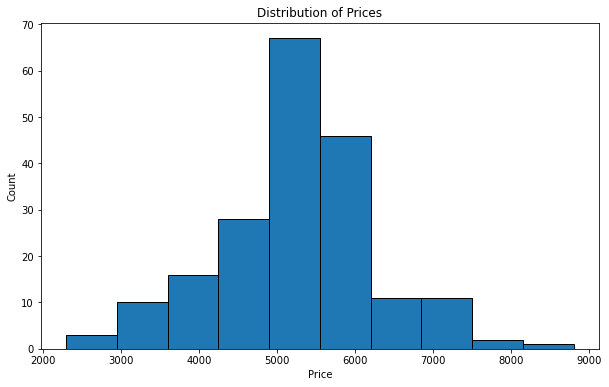

In [57]:
from matplotlib import figure
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.hist(df_prius['price'], edgecolor='black');
plt.xlabel("Price")
plt.ylabel('Count')
plt.title("Distribution of Prices");

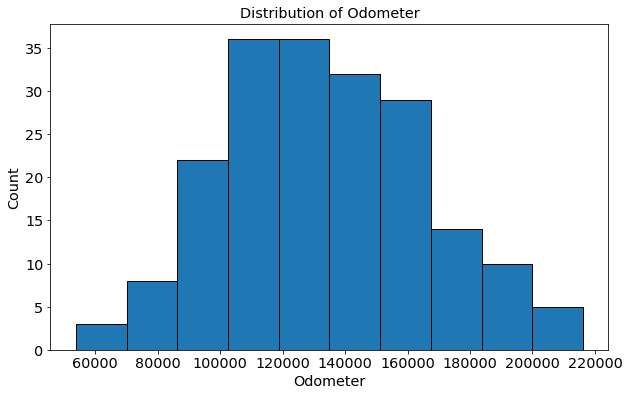

In [60]:
plt.figure(figsize=(10, 6))
plt.hist(df_prius['odometer'], edgecolor='black');
plt.xlabel("Odometer")
plt.ylabel('Count')
plt.title("Distribution of Odometer");

No handles with labels found to put in legend.


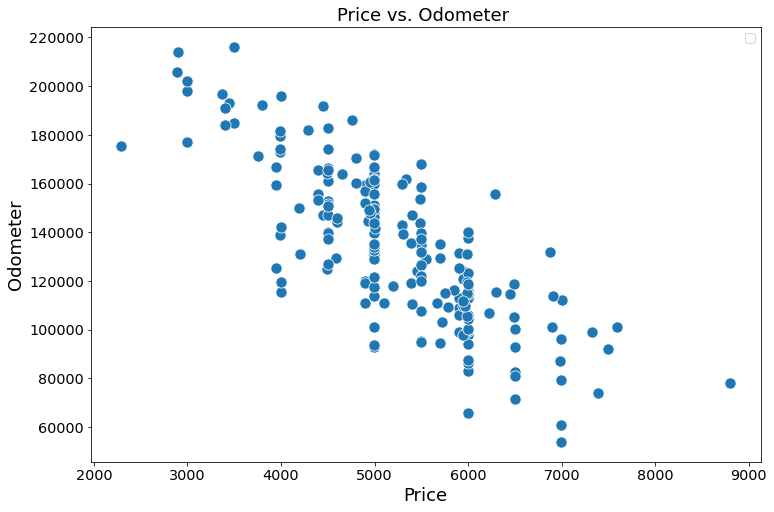

In [65]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='odometer', palette='summer', x_jitter=True, y_jitter=True, s=125, data=df_prius.dropna())
plt.legend(fontsize=12)
plt.xlabel("Price", fontsize=18)
plt.ylabel("Odometer", fontsize=18);
plt.title("Price vs. Odometer ", fontsize=18);

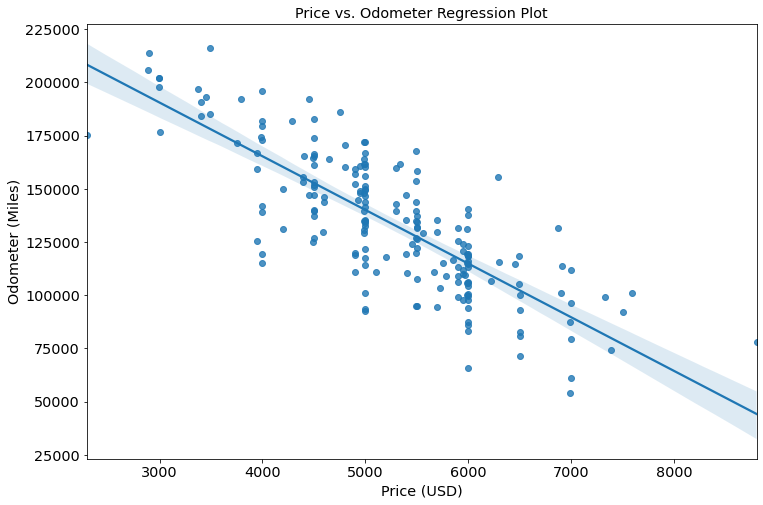

In [59]:

plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='odometer', data=df_prius.dropna());
plt.title('Price vs. Odometer Regression Plot');
plt.xlabel("Price (USD)");
plt.ylabel("Odometer (Miles)");

#### Statistical descriptive analysis

In [68]:
df_prius.describe()


,Unnamed: 0,price,odometer
count,195.000000,195.000000,195.000000
mean,97.000000,5238.600000,134027.630769
std,56.435804,1015.882971,32208.565932
min,0.000000,2295.000000,53801.000000
25%,48.500000,4500.000000,111076.500000
50%,97.000000,5200.000000,131768.000000
75%,145.500000,5988.500000,156385.000000
max,194.000000,8800.000000,216206.000000
